## Import Libraries

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Reading the Dataset

In [3]:
df = pd.read_csv("D:\\FA_project\\amazon_alexa.tsv",sep='\t')

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [10]:
# THE DATASET CONTAINS 5 COLUMNS AND 3150 ROWS
df.shape


(3150, 5)

In [13]:
pip install -U pandas-profiling

     ------------------------------------- 325.0/325.0 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 102.7/102.7 kB ? eta 0:00:00
     ------------------------------------- 663.5/663.5 kB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.7/4.7 MB 37.8 MB/s eta 0:00:00
     ---------------------------------------- 296.5/296.5 kB ? eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=0bbb46ed59bc5f37b330b8ade85d93fe23ab373c6d55a62ffe54b8e70781da3f
  Stored in directory: c:\users\025018\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, explorative=True, dark_mode=True)
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#No null values
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [17]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [18]:
rating = df['rating'].value_counts()

In [19]:
num = rating.index

In [20]:
qua = rating.values

In [21]:
color = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']

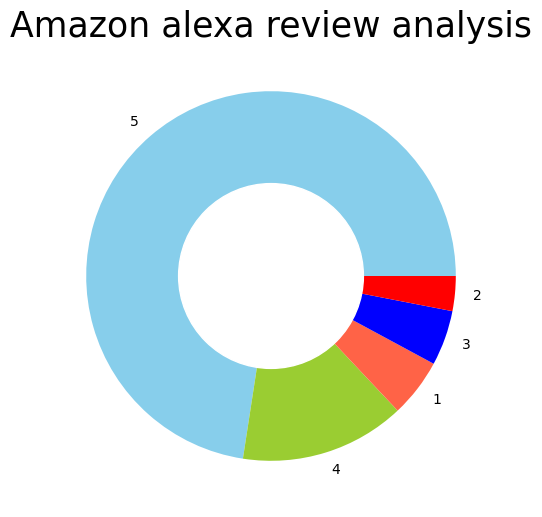

In [22]:
plt.figure(figsize=(6,6))
plt.pie(qua, labels=num, colors=color)
circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.rc('font', size=10)
plt.title('Amazon alexa review analysis', fontsize=25)
plt.show()

In [28]:
positive = df[df['feedback'] == 1] 
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


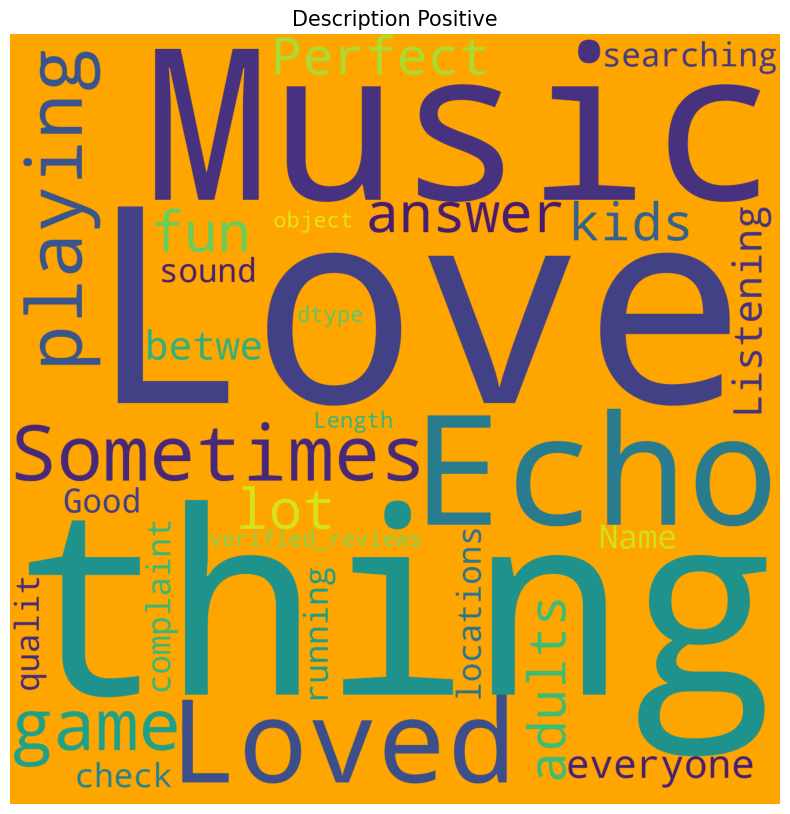

In [29]:
# For the most used words, lets make a word cloud
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['verified_reviews']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [31]:
negative = df[df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


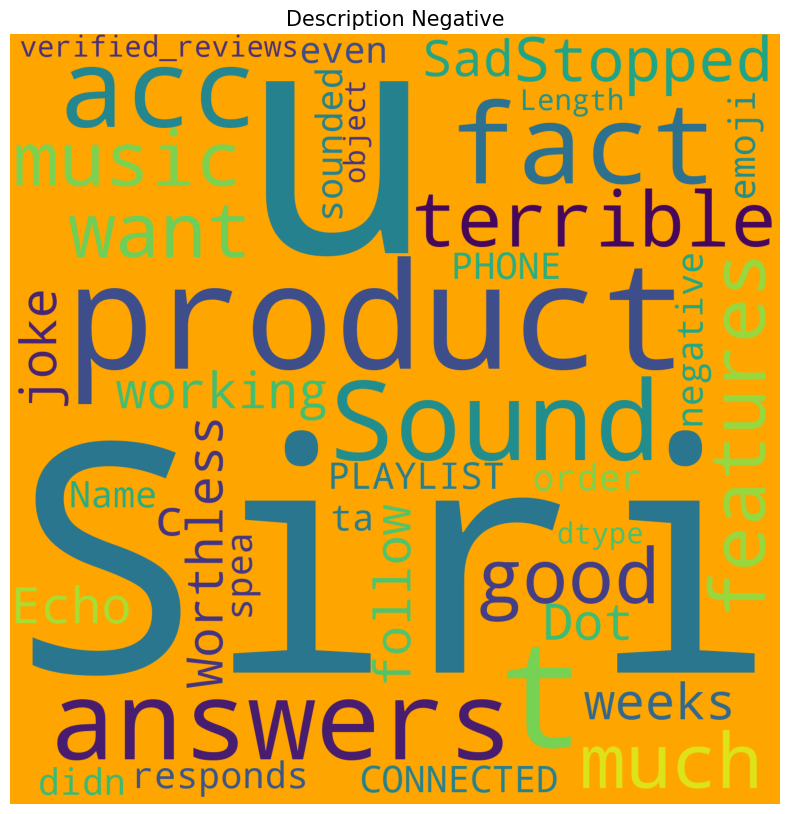

In [32]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['verified_reviews']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

## Preprocessing 

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\025018\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
# Lets make a model for prediciton of feedback which is positive or negative
df= df.drop(['date', 'rating'], axis = 1)

In [34]:
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [36]:
# Now we one hot encode our variation columns and remove first to avoid dummy trap
variation_dummies = pd.get_dummies(df['variation'],drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
df.drop(['variation'], axis = 1, inplace=True)

In [39]:
df= pd.concat([df, variation_dummies], axis = 1)
df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [41]:
alexa_countvectorizer.shape

(3150, 4044)

In [42]:
# lets look at 50 the features we have got
print(vectorizer.get_feature_names()[::80])

['00', 'abode', 'advertising', 'americans', 'asking', 'basic', 'blows', 'buts', 'challenged', 'collectors', 'connection', 'crap', 'defence', 'direct', 'downloading', 'embarrassed', 'exactly', 'fans', 'floored', 'geeks', 'group', 'hell', 'human', 'initial', 'iphone', 'knows', 'liking', 'lucky', 'messed', 'my', 'noticeable', 'orders', 'pattern', 'playing', 'prior', 'quiet', 'recording', 'requesting', 'said', 'senior', 'simplified', 'solution', 'sports', 'stuff', 'talk', 'third', 'track', 'unhelpful', 'versions', 'week', 'worth']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [43]:
df.drop(['verified_reviews'], axis = 1, inplace=True) 
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [45]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df= pd.concat([df, reviews], axis = 1)
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = df.drop(['feedback'], axis = 1)
y = df['feedback']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [50]:
x_train.shape,x_test.shape

((2520, 4059), (630, 4059))

In [51]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



LogisticRegression()

In [52]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [53]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[ 22  37]
 [  5 566]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.37      0.51        59
           1       0.94      0.99      0.96       571

    accuracy                           0.93       630
   macro avg       0.88      0.68      0.74       630
weighted avg       0.93      0.93      0.92       630

----------------------------------------------------------------------------------------------------
Accuracy =  93.33333333 %


In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [55]:
x_train = x_train.to_numpy().reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.to_numpy().reshape(x_test.shape[0], x_test.shape[1], 1)

In [56]:
# model creation
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (4059,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4058, 32)          96        
                                                                 
 batch_normalization (BatchN  (None, 4058, 32)         128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 4058, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 4057, 64)          4160      
                                                                 
 batch_normalization_1 (Batc  (None, 4057, 64)         256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 4057, 64)          0

In [58]:
#adding a checkpointer to save the model weights if the accuracy improves over validation dataset
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 9),
                ModelCheckpoint(
                    filepath='model.weights.best.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

In [59]:
#training the model
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=1, callbacks=checkpointer)


Epoch 1/40
79/79 [==============================] - ETA: 0s - loss: 2.5227 - accuracy: 0.9083
Epoch 1: val_accuracy improved from -inf to 0.90635, saving model to model.weights.best.hdf5
79/79 [==============================] - 19s 233ms/step - loss: 2.5227 - accuracy: 0.9083 - val_loss: 0.6516 - val_accuracy: 0.9063
Epoch 2/40
79/79 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.9234
Epoch 2: val_accuracy did not improve from 0.90635
79/79 [==============================] - 18s 228ms/step - loss: 0.4390 - accuracy: 0.9234 - val_loss: 0.4904 - val_accuracy: 0.9063
Epoch 3/40
79/79 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.9278
Epoch 3: val_accuracy did not improve from 0.90635
79/79 [==============================] - 18s 231ms/step - loss: 0.3474 - accuracy: 0.9278 - val_loss: 0.4252 - val_accuracy: 0.9063
Epoch 4/40
79/79 [==============================] - ETA: 0s - loss: 0.3119 - accuracy: 0.9306
Epoch 4: val_accuracy did not imp

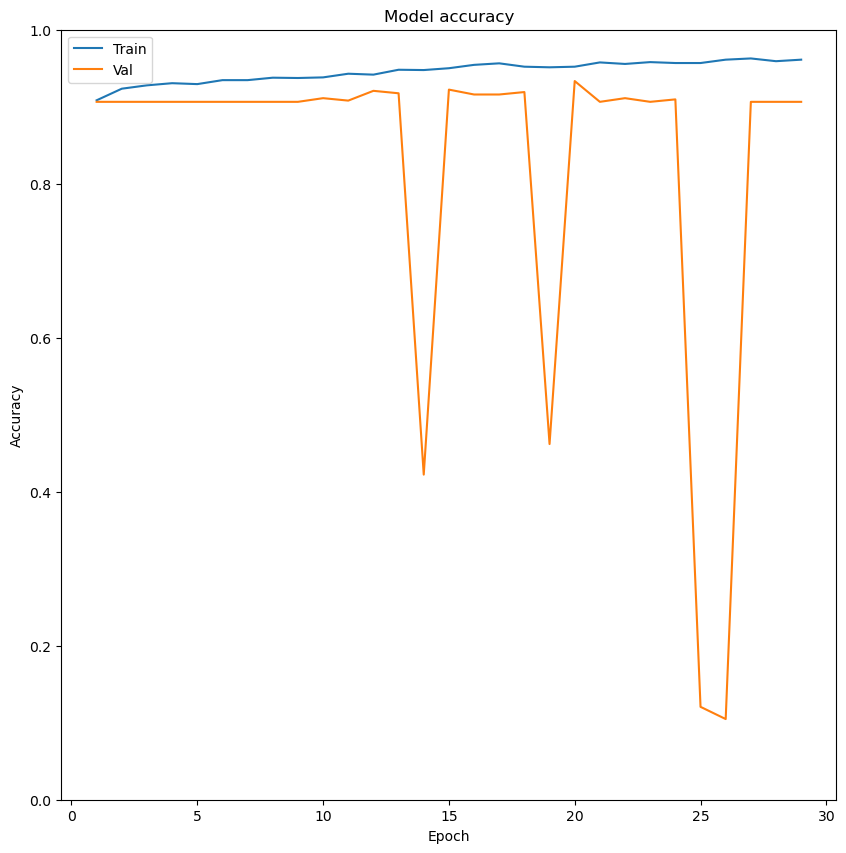

In [60]:
# plotting curve of model accuracy over the training time
epochs = len(history.history['accuracy'])
epoch_range = range(1, epochs+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom = 0,top=1)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

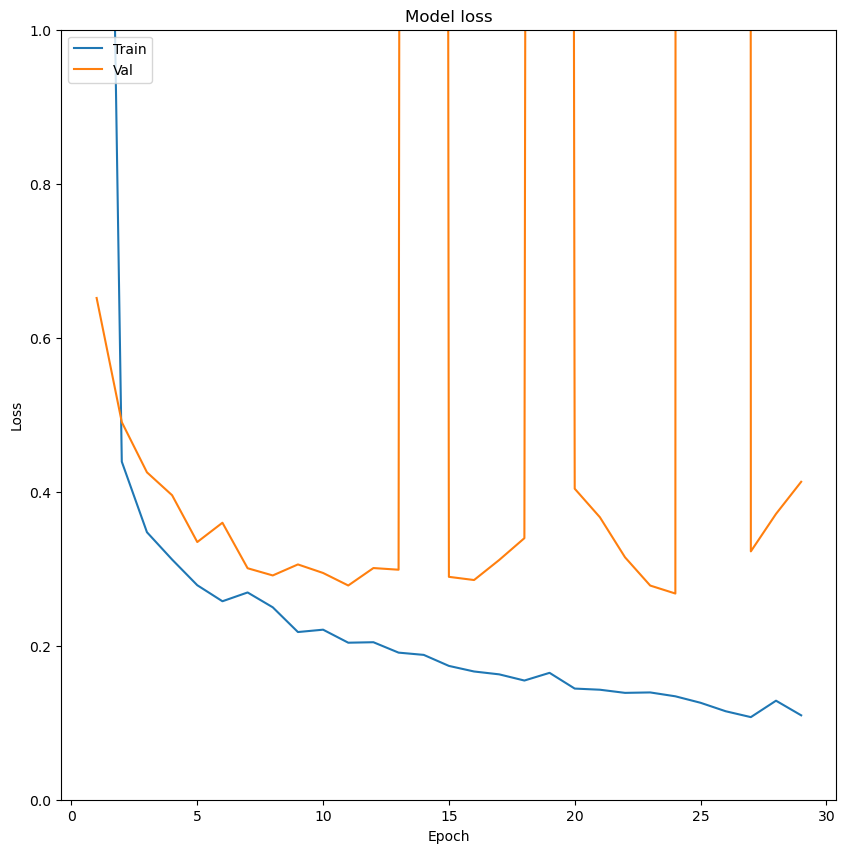

In [61]:
# plotting curve of model loss over the training time
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(bottom = 0,top=1)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()